In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline

In [2]:
with open('data/titanic.pkl', 'rb') as f:
    data = joblib.load(f)
locals().update(data)

In [3]:
pred = best_grid.predict(titanic.drop('Survived', axis='columns'))

In [4]:
from sklearn.metrics import confusion_matrix
confusion_matrix(titanic.Survived, pred)

array([[512,  37],
       [ 77, 265]], dtype=int64)

In [5]:
pred = best_grid.predict_proba(titanic.drop('Survived', axis='columns'))
pred

array([[0.95744681, 0.04255319],
       [0.        , 1.        ],
       [0.625     , 0.375     ],
       ...,
       [0.57142857, 0.42857143],
       [0.71428571, 0.28571429],
       [0.85714286, 0.14285714]])

In [6]:
threshold = 0.5
confusion_matrix(titanic.Survived, pred[:,1]>threshold)

array([[512,  37],
       [ 77, 265]], dtype=int64)

In [7]:
threshold = 0.4
confusion_matrix(titanic.Survived, pred[:,1]>threshold)

array([[495,  54],
       [ 63, 279]], dtype=int64)

In [8]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(titanic.Survived, pred[:,1])

In [9]:
pd.DataFrame({'Precision':precisions[:len(thresholds)], 'Recall':recalls[:len(thresholds)], 'Threshold':thresholds})

,Precision,Recall,Threshold
0,0.383838,1.000000,0.000000
1,0.478076,0.988304,0.042553
2,0.516179,0.979532,0.089888
3,0.600368,0.953216,0.111111
4,0.613208,0.950292,0.125000
5,0.647773,0.935673,0.142857
6,0.703371,0.915205,0.166667
7,0.711670,0.909357,0.200000
8,0.759398,0.885965,0.222222
9,0.776623,0.874269,0.285714


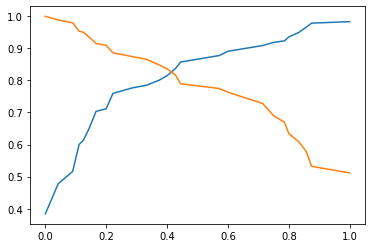

In [10]:
plt.plot(thresholds, precisions[0:len(thresholds)])
plt.plot(thresholds, recalls[0:len(thresholds)]);

In [11]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(titanic.Survived, pred[:,1])

In [12]:
pd.DataFrame({'fprs':fprs[:len(thresholds)], 'tprs':tprs[:len(thresholds)], 'Threshold':thresholds})

,fprs,tprs,Threshold
0,0.000000,0.000000,2.000000
1,0.005464,0.511696,1.000000
2,0.007286,0.532164,0.875000
3,0.012750,0.578947,0.857143
4,0.020036,0.608187,0.833333
5,0.027322,0.634503,0.800000
6,0.034608,0.669591,0.785714
7,0.038251,0.690058,0.750000
8,0.045537,0.728070,0.714286
9,0.058288,0.763158,0.600000


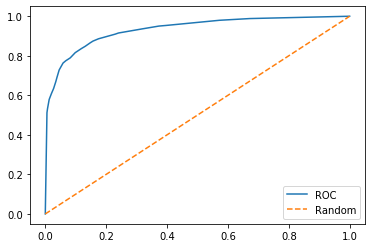

In [13]:
plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1], [0,1], '--', label='Random')
plt.legend()

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(titanic.Survived, pred[:,1])

0.9321200694511018